# Using UMAP to visualize the cell-cell communication

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scanpy as sc
import anndata as ad  
import pandas as pd
import seaborn as sns  

## Visualize Cell-cell communications through UMAP

In [2]:
Cell_pair = pd.read_pickle('NICHES_cell_pair.pkl')
CellMatrix = ad.AnnData(X =Cell_pair.T)
CellMatrix.X = CellMatrix.X.astype(float) 
metadata = pd.read_pickle('NICHES_metadata.pkl') 
st_meta = pd.read_pickle('st_meta.pkl') 
CellMatrix.obs = pd.DataFrame(metadata)

In [3]:
sc.pp.scale(CellMatrix)
sc.tl.pca(CellMatrix)
sc.pp.neighbors(CellMatrix)
sc.tl.umap(CellMatrix)

/mnt/hpc/home/analysis/yangwenyi1/miniconda3/envs/testpypi/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


In [4]:
celltype_colors = {  
    "L2.3.IT": "#1f77b4",  
    "L4": "#ff7f0e",
    "L5.IT": "#2ca02c",
    "L5.PT": "#d62728",
    "L6.PT": "#9467bd"
}  
CellMatrix.obs['leiden_annot'] = CellMatrix.obs['ReceivingType'].astype('category')  
celltype_categories = list(celltype_colors.keys())  

CellMatrix.obs['leiden_annot'] = CellMatrix.obs['leiden_annot'].cat.set_categories(celltype_categories, ordered=True)  


/mnt/hpc/home/analysis/yangwenyi1/miniconda3/envs/testpypi/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


<Figure size 1920x1440 with 0 Axes>

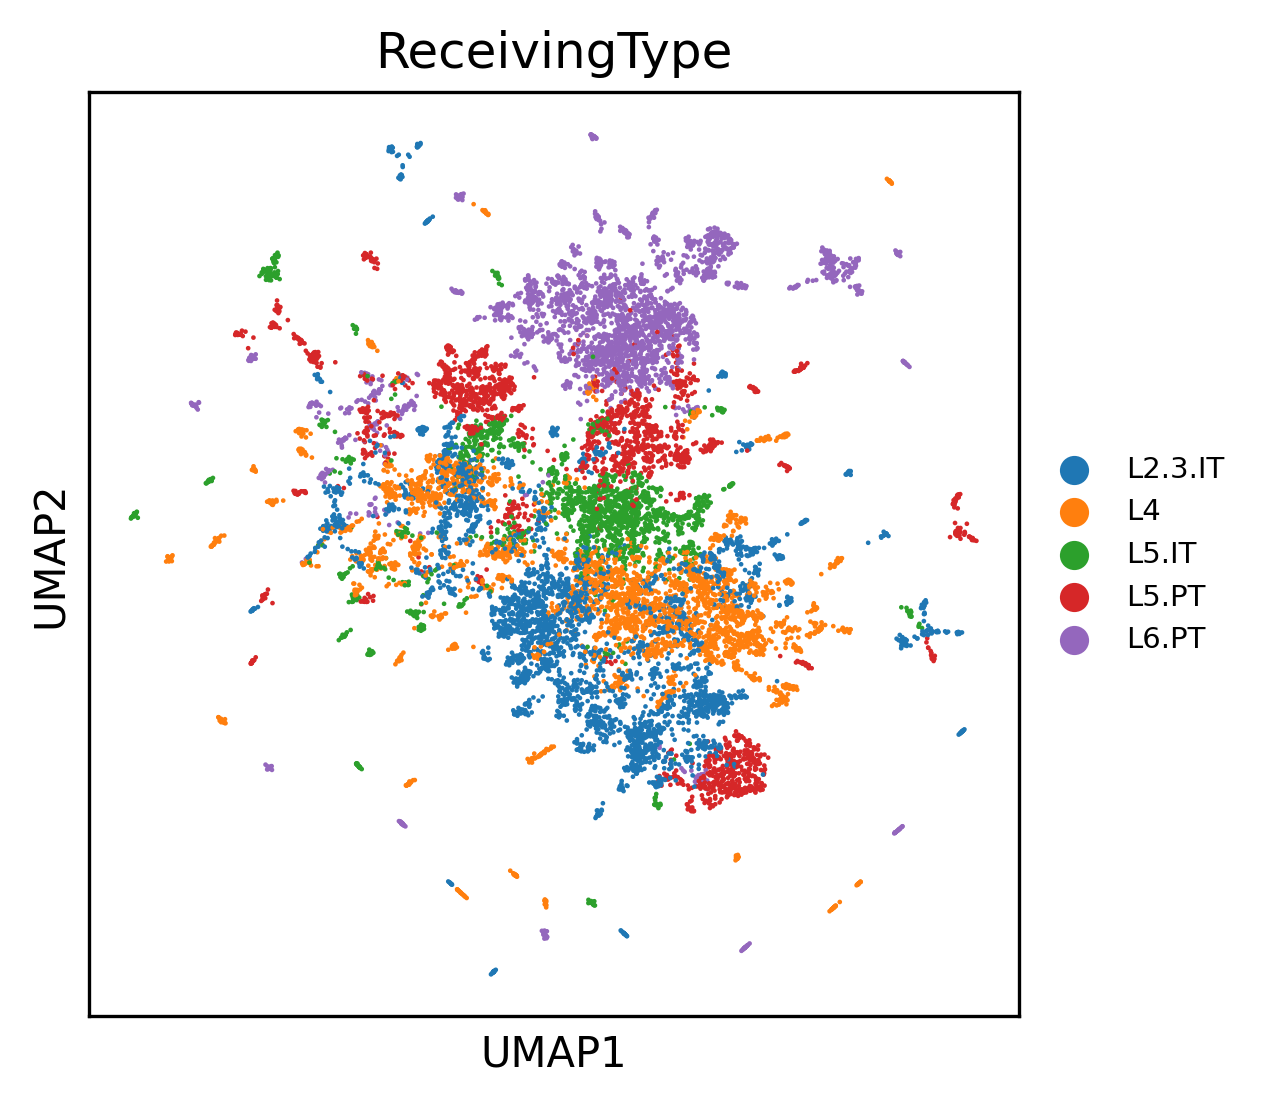

In [5]:
plt.figure(dpi=300)

with plt.rc_context({"figure.figsize": (4, 4), "figure.dpi": (300)}):

    sc.pl.umap(CellMatrix, color='leiden_annot', palette=list(celltype_colors.values()),
              size=5,legend_loc ="right margin",legend_fontsize=7, title= 'ReceivingType')


# Visualize cellular microenvironment

In [6]:
Cell_pair = pd.read_pickle('NICHES_Neighborcell_pair.pkl')
CellMatrix = ad.AnnData(X =Cell_pair.T)
CellMatrix.X = CellMatrix.X.astype(float) 
metadata = pd.read_pickle('NICHES_Neighbormetadata.pkl') 
st_meta = pd.read_pickle('st_meta.pkl') 
CellMatrix.obs = pd.DataFrame(metadata)

In [7]:
CellMatrix.obs

,orig.ident,nCount_NeighborhoodToCell,nFeature_NeighborhoodToCell,ReceivingCell,ReceivingType,nCount_RNA,nFeature_RNA,cell,x,y,celltype
Neighborhood—C24,SeuratProject,82.9458635599147,70,C24,L5.PT,1893.34,4005,C24,1244.813,6157.233,L5.PT
Neighborhood—C25,SeuratProject,98.9701754479662,77,C25,L5.PT,1747.90,3893,C25,1245.713,6185.583,L5.PT
Neighborhood—C28,SeuratProject,94.5359595028853,70,C28,L5.PT,1538.19,3578,C28,1258.763,6173.883,L5.PT
Neighborhood—C31,SeuratProject,92.5920324181283,76,C31,L5.PT,1855.78,3970,C31,1269.113,6073.983,L5.PT
Neighborhood—C34,SeuratProject,101.647906195724,92,C34,L5.PT,2231.83,4447,C34,1284.863,6127.533,L5.PT
...,...,...,...,...,...,...,...,...,...,...,...
Neighborhood—C2395,SeuratProject,106.415641191607,91,C2395,L2.3.IT,1646.70,3673,C2395,3144.263,5201.433,L2.3.IT
Neighborhood—C2389,SeuratProject,119.672178789938,136,C2389,L2.3.IT,2740.86,5066,C2389,3118.613,5260.833,L2.3.IT
Neighborhood—C2380,SeuratProject,95.066472462174,73,C2380,L2.3.IT,1171.61,3051,C2380,3095.663,5223.033,L2.3.IT
Neighborhood—C2390,SeuratProject,119.585794294873,125,C2390,L2.3.IT,2403.45,4811,C2390,3128.513,5245.983,L2.3.IT


In [8]:
sc.pp.scale(CellMatrix)
sc.tl.pca(CellMatrix)
sc.pp.neighbors(CellMatrix)
sc.tl.umap(CellMatrix)


In [9]:
celltype_colors = {  
    "L2.3.IT": "#1f77b4",  
    "L4": "#ff7f0e",
    "L5.IT": "#2ca02c",
    "L5.PT": "#d62728",
    "L6.PT": "#9467bd"
}  
CellMatrix.obs['leiden_annot'] = CellMatrix.obs['ReceivingType'].astype('category')  
celltype_categories = list(celltype_colors.keys())  

CellMatrix.obs['leiden_annot'] = CellMatrix.obs['leiden_annot'].cat.set_categories(celltype_categories, ordered=True)  

/mnt/hpc/home/analysis/yangwenyi1/miniconda3/envs/testpypi/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


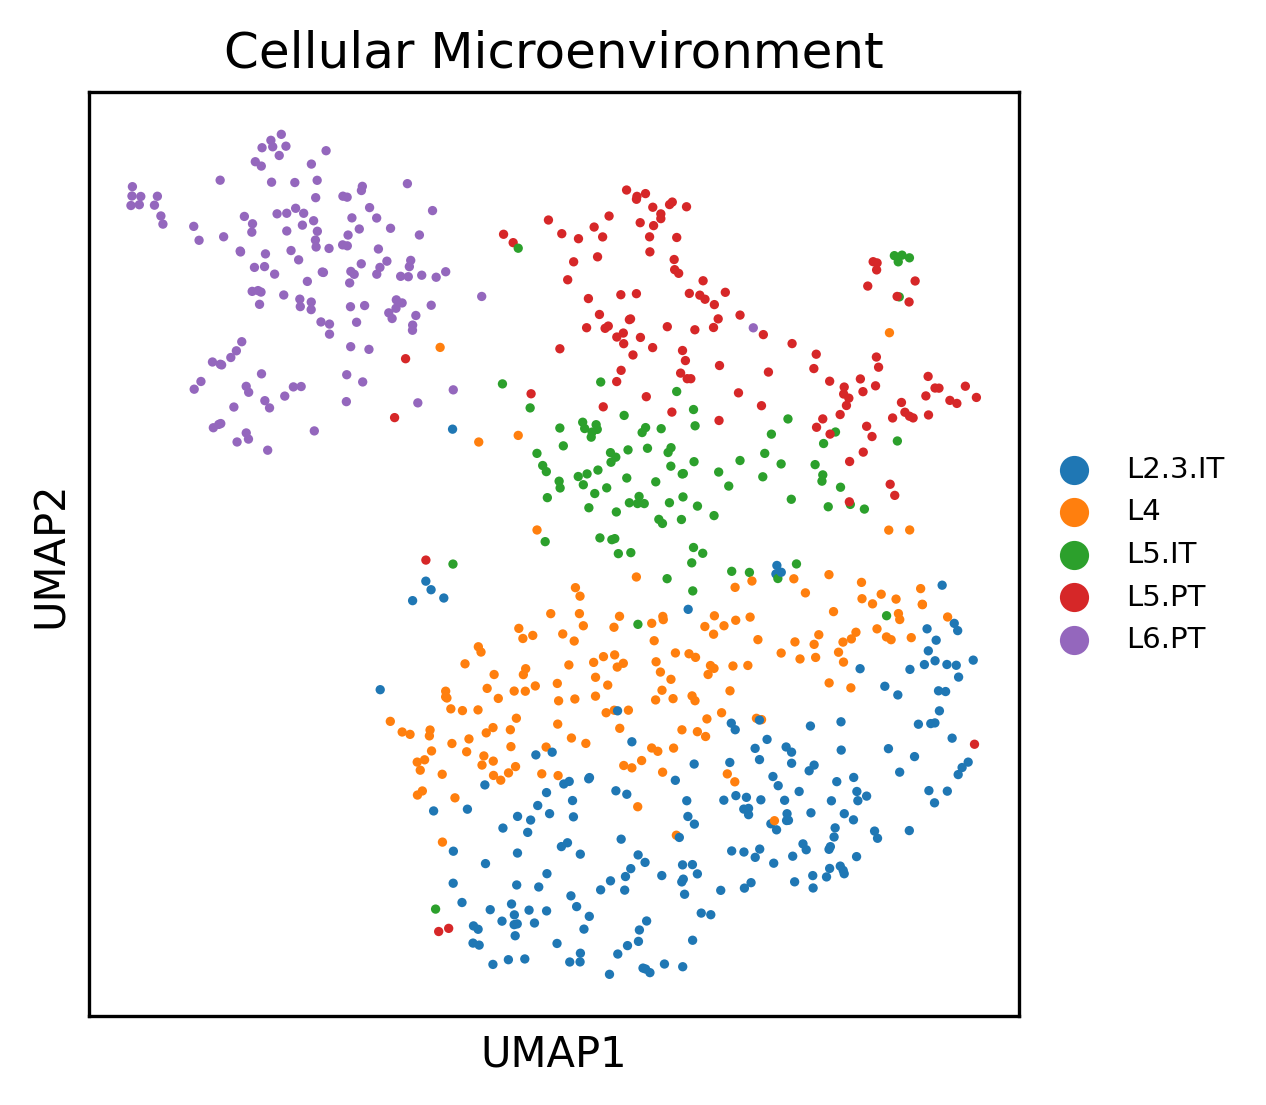

In [10]:
with plt.rc_context({"figure.figsize": (4, 4), "figure.dpi": (300)}):

    sc.pl.umap(CellMatrix, color='leiden_annot', palette=list(celltype_colors.values()),
              size=20,legend_loc ="right margin",legend_fontsize=7, title= 'Cellular Microenvironment')

## Using Box Plot to visualize the communication scores between adjacent and distant cell types

In [11]:
Cell_pair = pd.read_pickle('NICHES_cell_pair.pkl')
Cell_pair = Cell_pair.astype(float)  

In [12]:
row_means = Cell_pair.T.mean(axis=1)
mean_score = pd.DataFrame(Cell_pair.T['Efna5—Epha7'])
mean_score.rename(columns={'Efna5—Epha7': 'score'}, inplace=True)
mean_score['score'] = row_means

In [13]:
df1 = st_meta
df2 = mean_score

In [14]:
total_scores_per_type = {}  
for celltype in set(df1['celltype']):  
    if celltype in {'L2.3.IT', 'L5.IT', 'L5.PT','L6.PT'}:  # 假设这些是我们要处理的celltype  
        l5_np_cells_type = df1[df1['celltype'] == celltype]['cell'].tolist()  
        l2_3_it_cells = df1[df1['celltype'] == 'L4']['cell'].tolist()  
          
        combinations = [(l5, l2) for l5 in l5_np_cells_type for l2 in l2_3_it_cells]  
          
        filtered_df2 = df2[df2.index.map(lambda x: tuple(x.split('.')) in combinations)]  
          
        total_scores_current_type = {cell: 0 for cell in l2_3_it_cells}  
          
        for index, row in filtered_df2.iterrows():  
            cell_after_dash = index.split('.')[1]  
            if cell_after_dash in total_scores_current_type:  
                total_scores_current_type[cell_after_dash] += row['score']  
          
        total_scores_per_type[celltype] = total_scores_current_type  

df_new = pd.DataFrame(total_scores_per_type)
print(df_new)  


          L5.PT  L6.PT   L2.3.IT     L5.IT
C382   0.686978    0.0  0.000000  1.756671
C394   0.509957    0.0  0.000000  2.619431
C431   0.365930    0.0  0.767439  1.513018
C461   3.810079    0.0  0.000000  3.100752
C473   0.365044    0.0  0.383589  1.511233
...         ...    ...       ...       ...
C2268  0.000000    0.0  2.536415  0.000000
C2274  0.000000    0.0  1.482686  1.407972
C2286  0.000000    0.0  6.750568  0.000000
C2296  0.000000    0.0  8.448425  0.446641
C2369  0.000000    0.0  6.272914  0.000000

[169 rows x 4 columns]


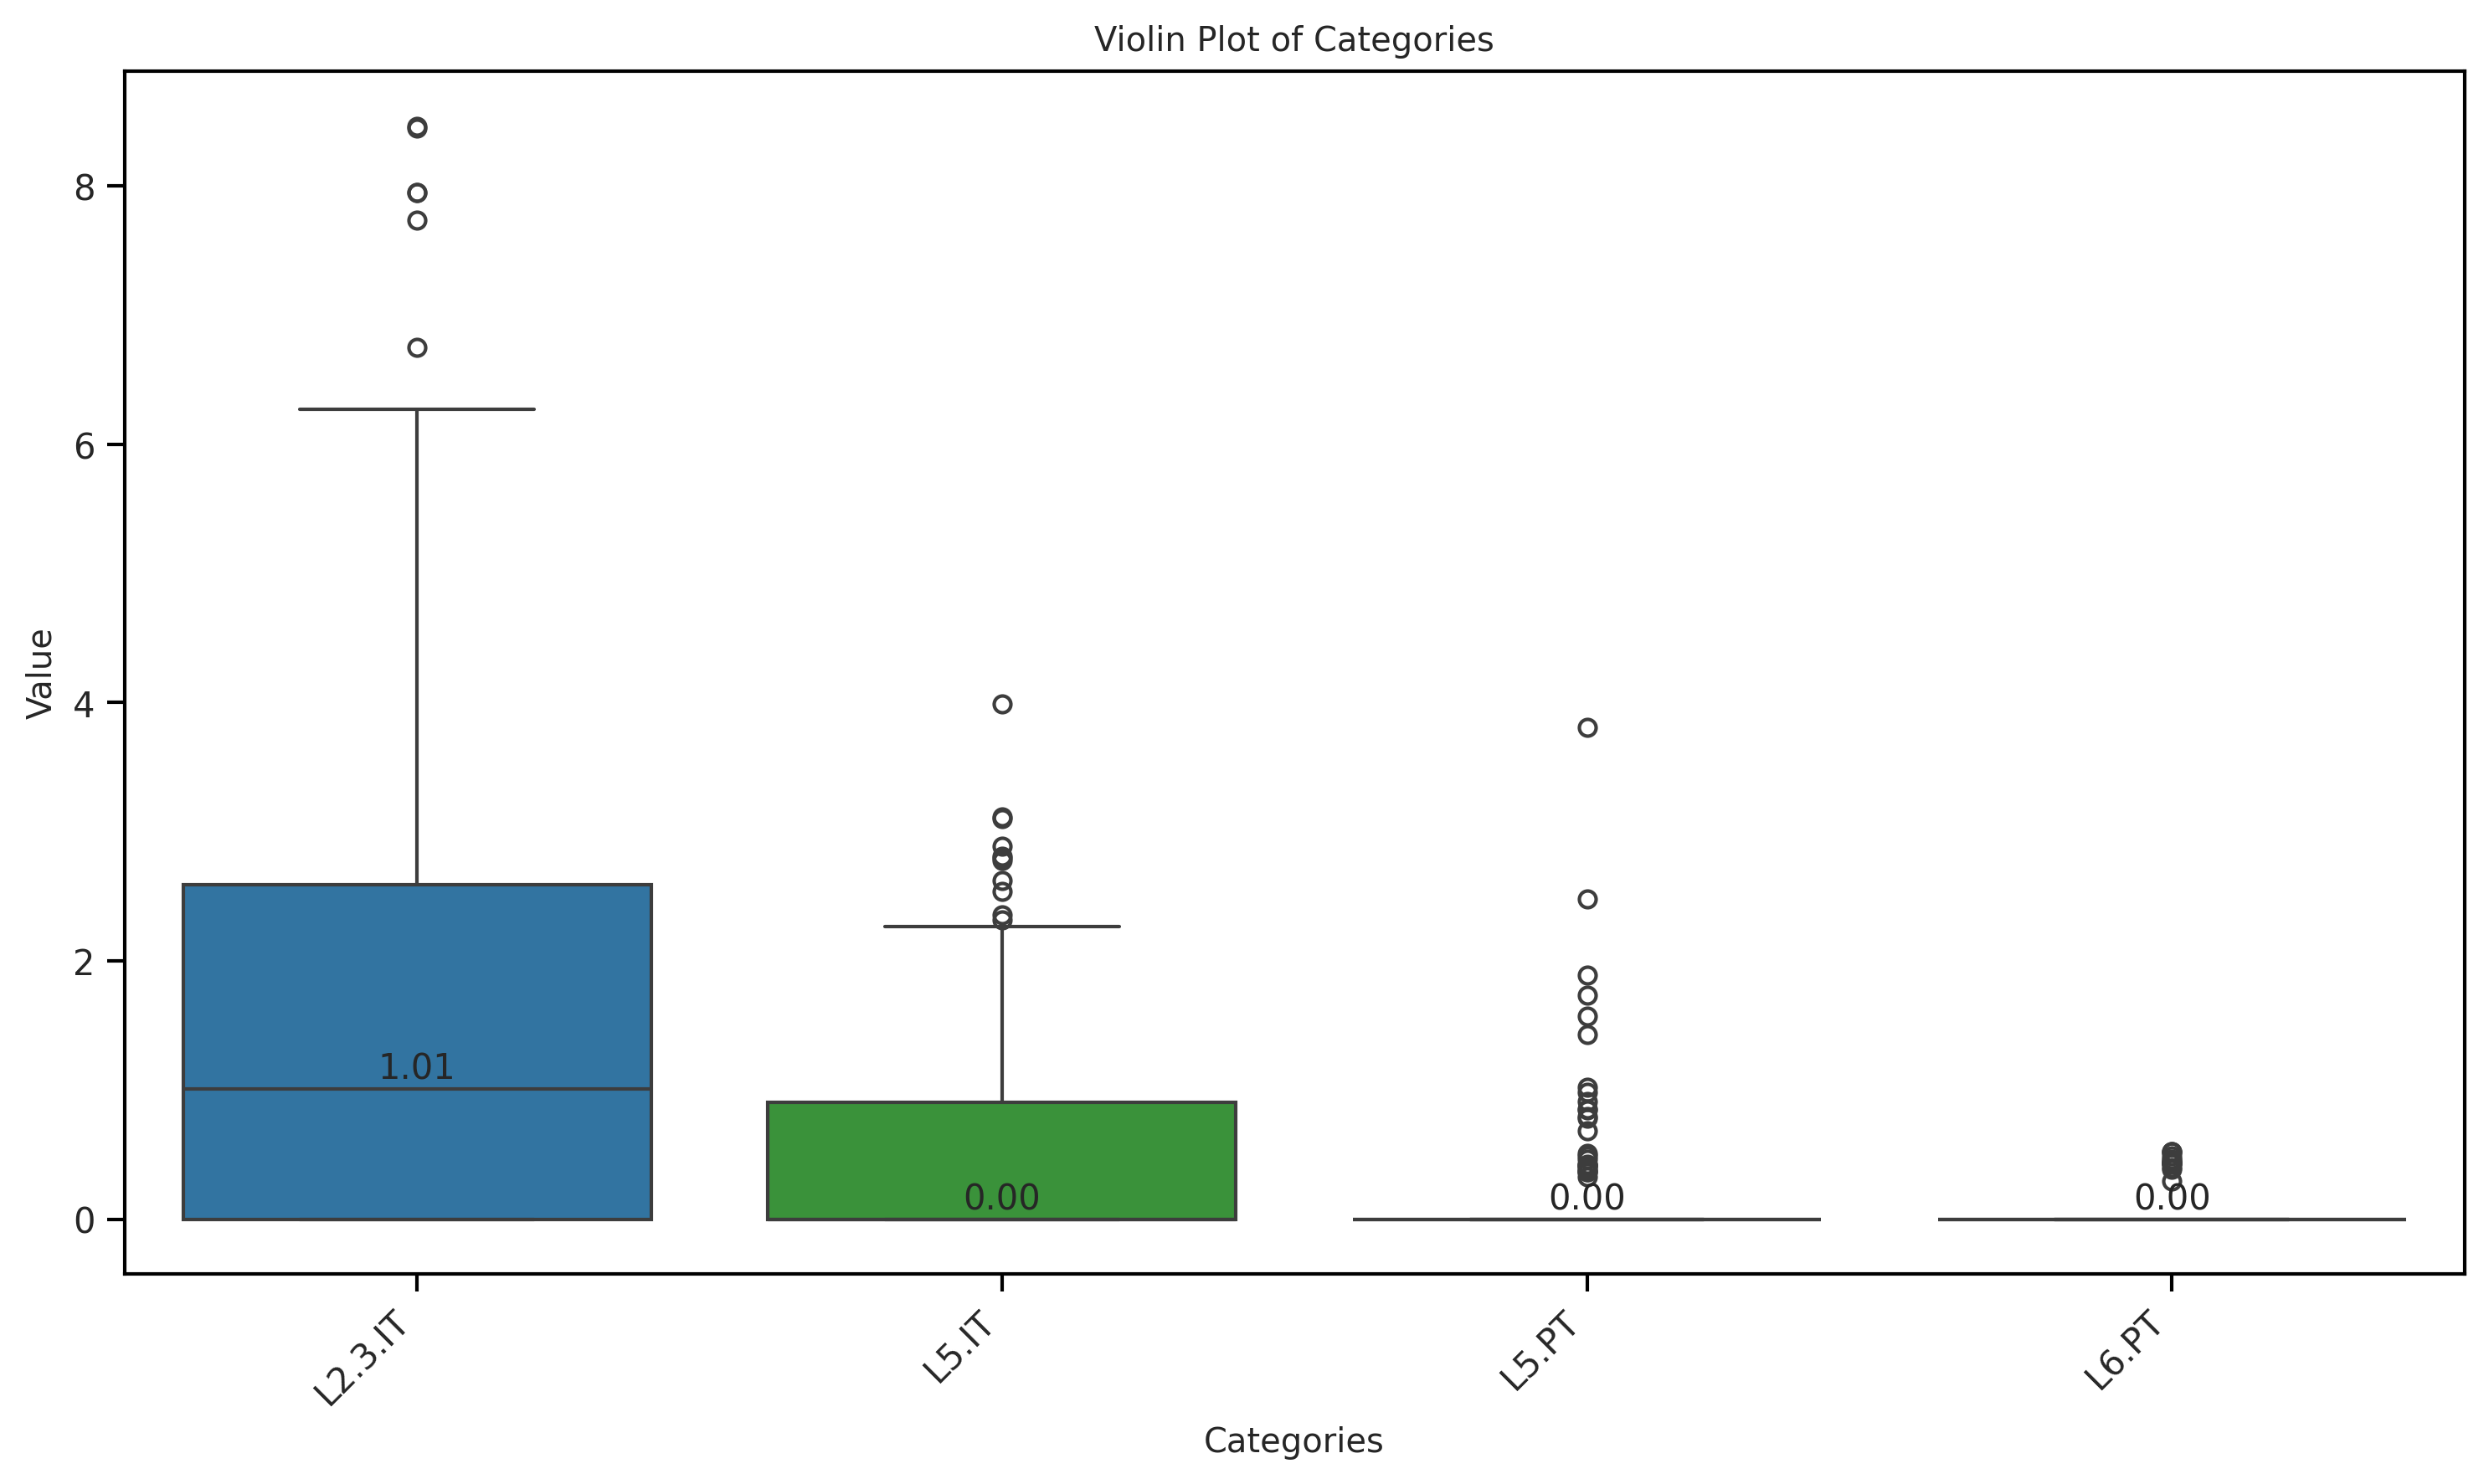

In [15]:

plt.figure(figsize=(10, 6), dpi=300)    

sns.set_style("white")    

sns.set_context("paper")    

categories = ['L2.3.IT', 'L5.IT', 'L5.PT', 'L6.PT']    

sns.boxplot(data=df_new[categories], palette=["#1f77b4","#2ca02c", "#d62728", "#9467bd"],      
                order=categories)      

plt.xlabel('Categories')  
plt.xticks(ticks=range(len(categories)), labels=categories, rotation=45, ha='right')

plt.ylabel('Value')  

plt.title('Violin Plot of Categories')  

plt.gca().legend_ = None    

medians = df_new[categories].median()      
for x, (label, median) in enumerate(medians.items()):      
    plt.text(x, median + 0.02, f'{median:.2f}', ha='center', va='bottom', fontsize=10)
    #plt.axvline(x=x+0.5, ymin=0, ymax=0.5, color='black', linestyle='--', linewidth=1)
plt.xticks(fontsize=10)  
plt.yticks(fontsize=10)  
  
for spine in plt.gca().spines.values():  
    spine.set_visible(True)

for spine in plt.gca().spines.values():  
    spine.set_color('black')  
    spine.set_linewidth(1)  

plt.gca().xaxis.set_ticks_position('bottom')  
plt.gca().yaxis.set_ticks_position('left')  

plt.tick_params(axis='both', which='major', length=5, width=1, color='black')  

#sns.despine(left=True, bottom=True)    
#plt.savefig('./figures/NICHES_violin_plot.pdf', format='pdf', dpi=300, bbox_inches='tight')  

plt.tight_layout()
plt.show()